In [1]:
#!pip install requests
#!pip install beautifulsoup4

In [2]:
import numpy as np
import pandas as pd
import requests
import bs4
import lxml.etree as xml

In [3]:
#-----------------------To read population density---------------------
url3='https://www.indexmundi.com/facts/united-states/quick-facts/texas/population-density#table'
popDensity = pd.read_html(url3)

for cell in popDensity:
  popDensity=cell

popDensity['Value']=np.log(popDensity['Value'])  # make the population dessity in logorithm
popDensity
#popDensity.set_index('County')

,County,Value
0,Anderson,4.007333
1,Andrews,2.292535
2,Angelina,4.689511
3,Aransas,4.520701
4,Archer,2.302585
...,...,...
249,Wood,4.174387
250,Yoakum,2.292535
251,Young,3.010621
252,Zapata,2.639057


Transmission rate was estimated with shared source code in journal paper under R environment. 

In [4]:
#-------------To read transmission rate R(t) (3 days rolling)-----------------
import pandas as pd
from datetime import datetime

url_rt3='https://raw.githubusercontent.com/XJQiao/Rt_estimation/master/Rt_3days_Rolling.csv'
rt3=pd.read_csv(url_rt3)
rt3=rt3.rename(columns={'Unnamed: 0': 'Dates'})
rt3=rt3.set_index('Dates')

rt3=rt3.T.copy()
dates = [datetime.strptime(sub, '%Y/%m/%d') for sub in rt3.keys()]  
rt3=rt3.T.copy()
#rt=rt.set_index("Dates")
rt3.index=dates
rt3

,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,Coke,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,0.448913,0.978154,1.087645,0.274185,0.722377,2.032495,1.113195,1.020812,2.654227,1.330863,1.385759,4.940566,0.143702,1.269299,1.724693,1.134186,1.502104,0.654024,1.202762,0.733671,1.006332,5.0,0.630709,1.308527,1.185866,1.610447,0.753491,1.562267,2.789288,0.904172,1.001859,6.304106,1.639544,0.832932,1.044435,1.660132,1.268151,1.408971,0.867197,1.755563,...,0.282081,2.892312,3.200048,2.139119,1.189994,1.377443,0.841975,5.0,1.750072,2.220690,1.047178,1.241185,1.193610,1.284514,2.850351,1.178795,1.896880,0.877423,17.550546,1.554053,0.932406,3.356951,1.003614,1.411096,1.606822,0.660399,1.064952,7.988273,1.247065,1.039807,0.145488,1.399871,0.912100,1.102990,1.341284,1.236562,1.168847,1.603844,0.563448,1.213160
2020-09-20,0.313695,1.011689,0.954794,0.433493,0.676685,1.625035,0.884912,1.125172,2.445652,0.970353,1.470356,4.980428,0.195456,1.366158,1.693674,1.360263,1.462653,0.757858,1.075614,0.767081,0.880075,5.0,0.834931,1.544057,1.204769,1.403840,0.871442,1.625124,2.559848,0.935596,1.004860,5.219958,1.408485,0.984772,0.974503,1.776704,1.239995,1.781015,0.782570,1.658083,...,0.518545,3.750008,2.559297,1.773625,0.892156,1.401506,0.892227,5.0,1.807044,1.998665,1.096825,1.222672,1.184007,1.175580,3.048992,0.980892,2.465831,0.943427,26.110352,1.597145,0.890332,3.440698,0.936905,1.440099,1.549528,0.734184,1.130200,6.478319,1.190743,1.189008,0.222361,1.449277,0.7

In [5]:
#-------------To read transmission rate R(t) (without rolling)-----------------
import pandas as pd
from datetime import datetime

url_rt='https://raw.githubusercontent.com/XJQiao/Rt_estimation/master/Rt_no_Rolling.csv'
rt=pd.read_csv(url_rt)
rt=rt.rename(columns={'Unnamed: 0': 'Dates'})
rt=rt.set_index("Dates")
rt=rt.T.copy()
dates = [datetime.strptime(sub, '%Y/%m/%d') for sub in rt.keys()]  
rt=rt.T.copy()
#rt=rt.set_index("Dates")
rt.index=dates
rt

,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,Coke,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13,0.320812,1.380490,0.540523,0.406813,0.749298,2.061593,1.148541,1.069032,3.048029,1.880026,1.174297,4.976293,0.450864,1.521728,2.445138,0.825411,1.603779,0.826279,1.216958,0.674870,1.054854,5.0,0.917651,1.708820,1.331007,1.762592,0.728194,1.700270,3.808555,0.913728,0.997967,10.000000,1.892089,0.554858,1.000810,2.426904,1.802392,1.562068,1.082784,1.820606,...,0.290696,4.040193,2.651901,2.951273,1.676379,1.584569,0.887904,5.0,2.533164,2.028879,1.216803,1.343991,1.279760,1.533704,12.942745,1.154181,1.670984,0.833262,1.097015,1.911223,0.996505,1.289303,1.147985,1.915215,2.254878,0.766735,0.938848,9.883161,1.228019,1.805996,0.252357,1.350874,1.024860,1.061591,1.605650,1.420127,1.998175,1.905019,0.182385,0.887911
2020-09-14,0.247374,1.311230,0.894593,0.702409,0.651624,1.823668,0.791963,1.457872,4.648033,1.342648,1.217484,4.992738,0.601088,1.622916,1.880044,1.179630,1.572824,1.065168,1.191314,0.717901,0.846345,5.0,1.081948,2.067447,1.422874,0.943921,1.070676,2.362870,4.626738,0.986345,0.964907,9.892233,1.668828,0.640251,0.914512,2.501058,1.502249,2.485862,0.556836,0.863010,...,0.534026,4.596983,3.092213,2.220877,1.344550,1.518696,0.819177,5.0,2.505011,1.814581,1.098255,1.246311,1.327977,1.708725,10.550069,0.840827,2.610708,1.206827,2.225379,1.550056,0.822849,1.573701,0.931239,1.965169,1.803585,0.653800,1.355924,11.333105,1.284207,2.136607,0.439795,1.525974,0

In [6]:
#-------------------Scatter plots-----------------
import numpy as np
############### Mean of Rt along the whole time series###############
rtM=pd.DataFrame([rt.mean(axis=0).index,rt.mean(axis=0).values])
rtM=rtM.T.copy()
rtM.columns=['County','RtM']
#rtM=rtM.set_index('County')

############### Mean of Rt in Jul and Aug ###############
rtM78=pd.DataFrame([rt.loc['2020-07-01':'2020-08-31'].mean(axis=0).index,rt.loc['2020-07-01':'2020-08-31'].mean(axis=0).values])
rtM78=rtM78.T.copy()
rtM78.columns=['County','RtM78']

############### Mean of Rt3 along the whole time series###############
rt3M=pd.DataFrame([rt3.mean(axis=0).index,rt3.mean(axis=0).values])
rt3M=rt3M.T.copy()
rt3M.columns=['County','Rt3M']

############### Mean of Rt3 in Jul and Aug ###############
rt3M78=pd.DataFrame([rt3.loc['2020-07-01':'2020-08-31'].mean(axis=0).index,rt3.loc['2020-07-01':'2020-08-31'].mean(axis=0).values])
rt3M78=rt3M78.T.copy()
rt3M78.columns=['County','Rt3M78']


R=pd.merge(rtM,rt3M)
RR=pd.merge(rtM78,rt3M78)
R=pd.merge(R,RR)
Var=pd.merge(popDensity,R,left_on='County',right_on='County')
#R=R.join(popDensity)
Var

,County,Value,RtM,Rt3M,RtM78,Rt3M78
0,Anderson,4.007333,2.19477,1.70409,1.55387,1.40809
1,Andrews,2.292535,1.89153,1.6093,1.01955,1.02711
2,Angelina,4.689511,1.20566,1.1319,1.0198,1.00115
3,Aransas,4.520701,2.4364,2.24703,1.09883,1.16334
4,Archer,2.302585,2.11677,1.85447,1.45712,1.42736
...,...,...,...,...,...,...
246,Wood,4.174387,1.33826,1.27927,1.10909,1.09997
247,Yoakum,2.292535,2.35319,1.93745,1.18614,1.14804
248,Young,3.010621,2.51833,2.35371,1.2671,1.1949
249,Zapata,2.639057,1.90642,1.75523,1.3042,1.18797


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



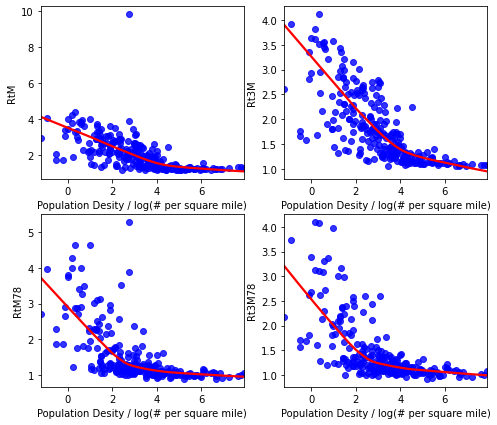

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import numpy as  np

fig = plt.figure(figsize=(8,7))


for pos,key in enumerate(Var.keys()[2:]):
  X = Var['Value']
  Y = np.array(Var[key], dtype=float)
  ax1 = fig.add_subplot(2,2,pos+1)
  sns.regplot(x=X, y=Y,lowess=True,color='blue',line_kws={"color":"red"})
  ax1.set_xlabel("Population Desity / log(# per square mile)")
  ax1.set_ylabel(key)
  #ax1.title.set_text(key)

fig.savefig('Rt.pdf')

In [8]:
#--------------To conduct Chi Square test using contingency---------------
tb = pd.crosstab(index=Var["Value"].round(0), 
                           columns=Var["Rt3M"].astype(int))
print(tb)
from scipy.stats import chi2_contingency
tt=chi2_contingency(tb)
tt

Rt3M    1   2   3  4
Value               
-1.0    2   1   1  0
 0.0    2   5   5  1
 1.0    8  12  10  0
 2.0   18  24   2  0
 3.0   40  17   0  0
 4.0   56   1   0  0
 5.0   23   1   0  0
 6.0   12   0   0  0
 7.0    7   0   0  0
 8.0    3   0   0  0


(152.4883283131671,
 1.8134616889515133e-19,
 27,
 array([[2.72509960e+00, 9.72111554e-01, 2.86852590e-01, 1.59362550e-02],
        [8.85657371e+00, 3.15936255e+00, 9.32270916e-01, 5.17928287e-02],
        [2.04382470e+01, 7.29083665e+00, 2.15139442e+00, 1.19521912e-01],
        [2.99760956e+01, 1.06932271e+01, 3.15537849e+00, 1.75298805e-01],
        [3.88326693e+01, 1.38525896e+01, 4.08764940e+00, 2.27091633e-01],
        [3.88326693e+01, 1.38525896e+01, 4.08764940e+00, 2.27091633e-01],
        [1.63505976e+01, 5.83266932e+00, 1.72111554e+00, 9.56175299e-02],
        [8.17529880e+00, 2.91633466e+00, 8.60557769e-01, 4.78087649e-02],
        [4.76892430e+00, 1.70119522e+00, 5.01992032e-01, 2.78884462e-02],
        [2.04382470e+00, 7.29083665e-01, 2.15139442e-01, 1.19521912e-02]]))

In [9]:
#---------------To conduct ANOVA test----------------
from scipy.stats import f_oneway
Var['Rt3M_int']=Var['Rt3M'].astype(int)
gp=Var.groupby('Rt3M_int')
#for group in gp:
  #print(group)

f_oneway(Var[Var["Rt3M_int"]==1]['Value'].values,Var[Var["Rt3M_int"]==2]['Value'].values,
         Var[Var["Rt3M_int"]==3]['Value'].values,Var[Var["Rt3M_int"]==4]['Value'].values)

F_onewayResult(statistic=44.404554866044776, pvalue=5.49178039213672e-23)

In [10]:
#---------------To conduct T test----------------
from scipy import stats
for i in range(1,4):

  for j in range(i+1,len(gp)):
    print(i)
    print(j)
    print(stats.ttest_ind(Var[Var["Rt3M_int"]==i]['Value'].values,Var[Var["Rt3M_int"]==j]['Value'].values))

1
2
Ttest_indResult(statistic=8.337401138840452, pvalue=6.963276918237139e-15)
1
3
Ttest_indResult(statistic=8.133201026354216, pvalue=5.6508532034421746e-14)
2
3
Ttest_indResult(statistic=4.9040540175011405, pvalue=5.106838394717237e-06)


In [11]:
#---------------To check pearson correlation----------------
from scipy import stats
stats.pearsonr(Var['Value'], Var['Rt3M'])

(-0.7302148314276373, 4.402054925485686e-43)

In [30]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML


Counties = rt3.keys()


fig = plt.figure()
ax=plt.gca()
ax.title.set_text('Nueces County Rt')
curve1, = plt.plot(rt3.T.keys(),rt3['Nueces'],label= 'Rt3',color='deeppink')
ax.legend(ncol=3)
plt.axvline(x=datetime(2020, 7, 1).date(),color='gray')

plt.ylim(0,10)
def update(i):
#     print('i:', i)
  
  curve1.set_data(rt3.T.keys(),rt3[Counties[i]])
  ax.title.set_text( Counties[i]+' County Cases')
  return curve1

anim = FuncAnimation(fig, update, frames=len(Counties),blit=False, interval=240)
plt.close()  # Closing the plot will make it not print the last frame of the plot.  So the next lin will be the only animation.

HTML(anim.to_html5_video())
